<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/study/sklearn/regularization_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RSS를 최소화 하는 것만 고려하다 보니 학습 데이터에 지나치게 맞추게 되고, 회귀 계수가 쉽게 커졌다.
- 문제 해결 방안 : cost = RSS + |회귀계수| 를 최소화하는 방향으로 학습
- 수식 :

    


\begin{align}
Min\left(RSS\left(W\right)\ +\ alpha\times {\left|W\right|}^2\right)
\end{align}

## **(1) 릿지 회귀**

- L2 규제 : W의 제곱에 대해 패널티를 부여하는 방식
- L2 규제를 적용한 회귀를 릿지 회귀라고 한다.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

df = pd.read_csv('BostonHousing.csv')
df.columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'price']

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(np.round(neg_mse_scores, 3))
print(np.round(rmse_scores, 3))
print(np.round(avg_rmse, 3))

[-11.422 -24.294 -28.144 -74.599 -28.517]
[3.38  4.929 5.305 8.637 5.34 ]
5.518


In [28]:
alphas = [0, 0.1, 1, 10 ,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print(np.round(avg_rmse, 3))

5.829
5.788
5.653
5.518
5.33


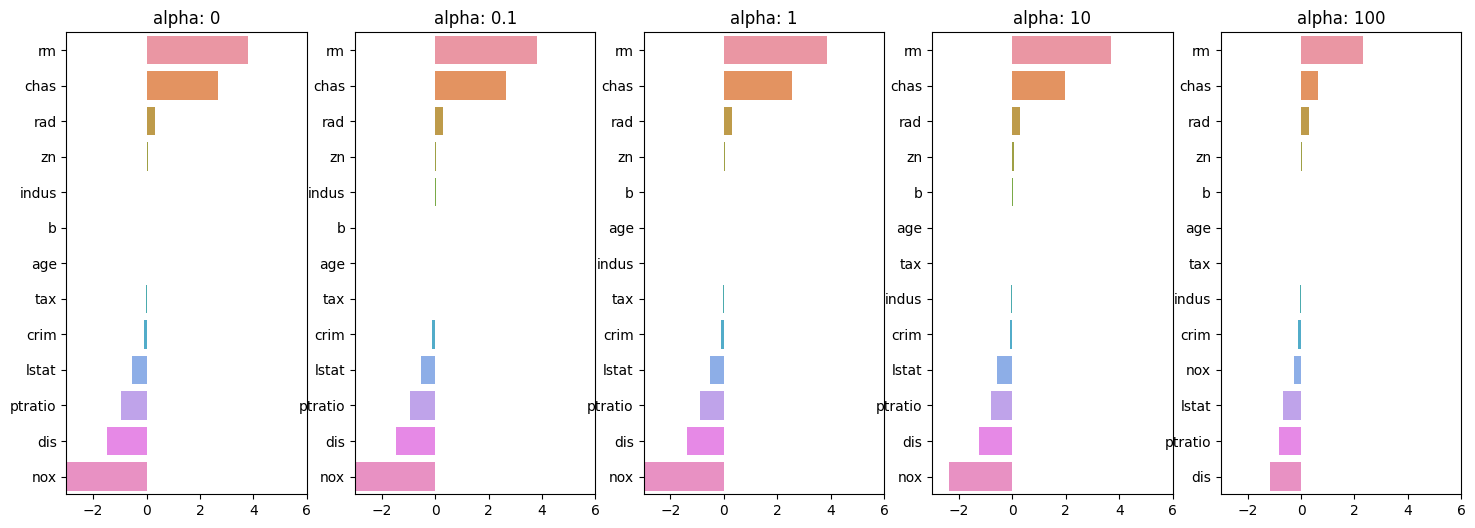

In [29]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X, y)
    coeff = pd.Series(data=ridge.coef_, index=X.columns)
    colname='alpha: '+str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

위의 그림을 보면 alpha 값을 계속 증가시킬수록 회귀 계수 값은 지속적으로 작아짐을 알 수 있다.
- 하지만 0이 되지는 않는다.


## **(2) 라쏘 회귀**

- L1 규제를 선형회귀에 적용
- RSS(W) + alpha * |W| 를 최소화

In [30]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X=None, y=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name, ' #######')

    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)

        neg_mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}, 평균 : {1:.3f}'.format(param, avg_rmse))

        model.fit(X, y)

        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=X.columns)
            colname = 'alpha: '+str(param)
            coeff_df[colname] = coeff

    return coeff_df

In [31]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X=X, y=y)

#######  Lasso  #######
alpha 0.07, 평균 : 5.612
alpha 0.1, 평균 : 5.615
alpha 0.5, 평균 : 5.669
alpha 1, 평균 : 5.776
alpha 3, 평균 : 6.189


In [33]:
sort_column = 'alpha: '+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
rm,3.789725,3.703202,2.498212,0.949811,0.000000
chas,1.434343,0.955190,0.000000,0.000000,0.000000
rad,0.270936,0.274707,0.277451,0.264206,0.061864
zn,0.049059,0.049211,0.049544,0.049165,0.037231
b,0.010248,0.010249,0.009469,0.008247,0.006510
nox,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
age,-0.011706,-0.010037,0.003604,0.020910,0.042495
tax,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
indus,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
crim,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


위처럼, alpha가 증가함에 따라 일부 피처의 회귀 계수는 아예 0으로 바뀜
- 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻을 수 있음

## **(3) 엘라스틱넷 회귀**

- L2 규제와 L1 규제를 결합한 회귀
- RSS(W) + alpha2 * |W|^2 + alpha1 * |W| 최소화하는 W 찾기
- 단점 : 수행 시간이 오래걸림


In [34]:
# l1_ratio = 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X=X, y=y)

#######  ElasticNet  #######
alpha 0.07, 평균 : 5.542
alpha 0.1, 평균 : 5.526
alpha 0.5, 평균 : 5.467
alpha 1, 평균 : 5.597
alpha 3, 평균 : 6.068


In [38]:
sort_column = 'alpha: '+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
rm,3.574162,3.414154,1.918419,0.938789,0.000000
chas,1.330724,0.979706,0.000000,0.000000,0.000000
rad,0.278880,0.283443,0.300761,0.289299,0.146846
zn,0.050107,0.050617,0.052878,0.052136,0.038268
b,0.010122,0.010067,0.009114,0.008320,0.007020
age,-0.010116,-0.008276,0.007760,0.020348,0.043446
tax,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
indus,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
crim,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
nox,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


위처럼 alpha=0.5일 때 가장 좋은 성능을 보여주고 있음

## **(4) 선형 회귀 모델을 위한 데이터 변환**

- 선형 회귀 모델은 피처값과 타깃값의 분포가 정규 분포 형태인 것을 선호한다
> 따라서 선형 회귀 모델에서는 데이터에 대한 스케일링/정규화 작업을 하는 것이 일반적 - 하지만 무조건 성능이 향상되는 것은 아님

### 피처 데이터 변환 작업
- StandardScaler 평균 0 분산 1 / MinMaxScaler 최대 1 최소 0
- 스케일링/정규화 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환하는 방법
- 원래 값에 log를 씌우면 정규 분포에 가까운 형태로 분포됨

### 타깃 데이터 변환 작업
- 일반적으로 로그 변환 적용

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)

    return scaled_data

In [42]:
alphas = [0.1, 1, 10, 100]

scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X)
    print('\n## 유형 : ', scale_method[0], scale_method[1])
    get_linear_reg_eval('Ridge', params=alphas, X=X_data_scaled, y=y, verbose=False, return_coeff=False)


## 유형 :  None None
alpha 0.1, 평균 : 5.788
alpha 1, 평균 : 5.653
alpha 10, 평균 : 5.518
alpha 100, 평균 : 5.330

## 유형 :  Standard None
alpha 0.1, 평균 : 5.826
alpha 1, 평균 : 5.803
alpha 10, 평균 : 5.637
alpha 100, 평균 : 5.421

## 유형 :  Standard 2
alpha 0.1, 평균 : 8.827
alpha 1, 평균 : 6.871
alpha 10, 평균 : 5.485
alpha 100, 평균 : 4.634

## 유형 :  MinMax None
alpha 0.1, 평균 : 5.764
alpha 1, 평균 : 5.465
alpha 10, 평균 : 5.754
alpha 100, 평균 : 7.635

## 유형 :  MinMax 2
alpha 0.1, 평균 : 5.298
alpha 1, 평균 : 4.323
alpha 10, 평균 : 5.185
alpha 100, 평균 : 6.538

## 유형 :  Log None
alpha 0.1, 평균 : 4.770
alpha 1, 평균 : 4.676
alpha 10, 평균 : 4.836
alpha 100, 평균 : 6.241
